Importing the libraries

In [ ]:
!pip install seaborn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing the dataset

In [ ]:
dataset = pd.read_csv('data.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

Handling missing values

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan , strategy = 'most_frequent')
X = imputer.fit_transform(X)

Encoding Categorical Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])

*Feature* Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc2 = StandardScaler()
X[:,0] = sc.fit_transform(X[:,0].reshape(-1, 1)).flatten()
X[:,2:] = sc2.fit_transform(X[:,2:])

In [ ]:
df = pd.DataFrame(X)
df.columns = dataset.columns[:10]

Visualization

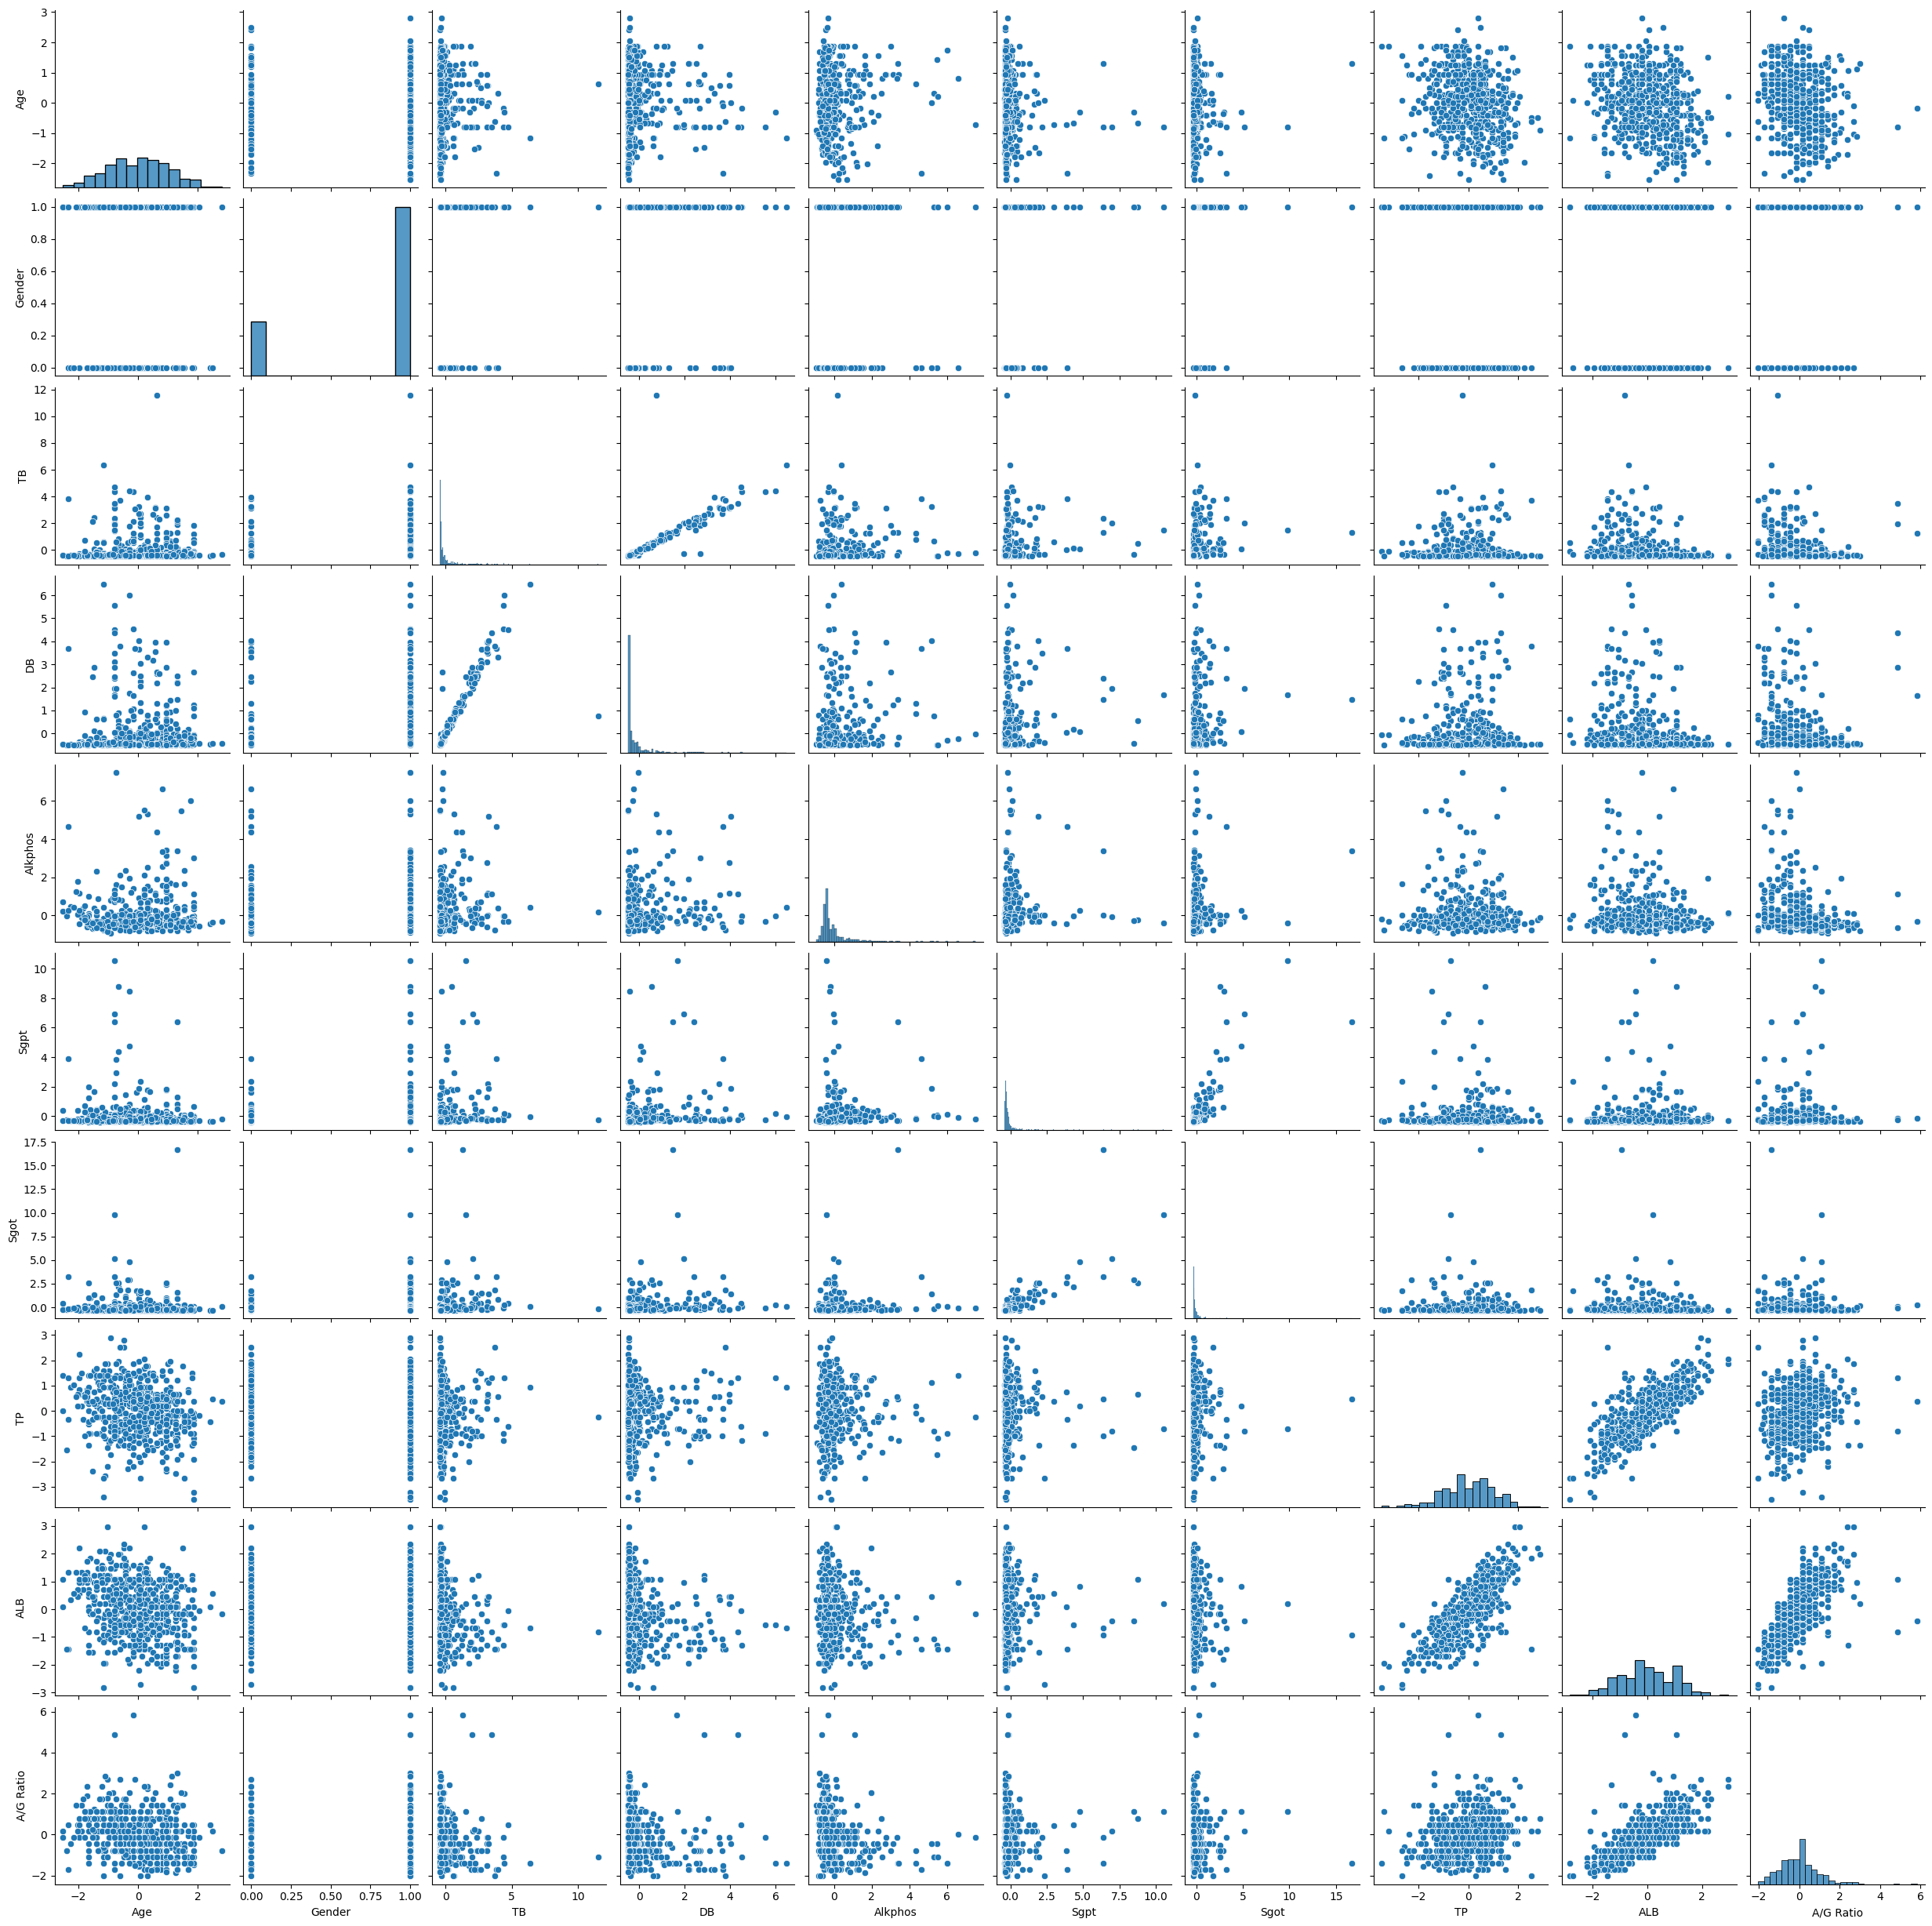

In [ ]:
sns.pairplot(df)

(11.0, -1.0)

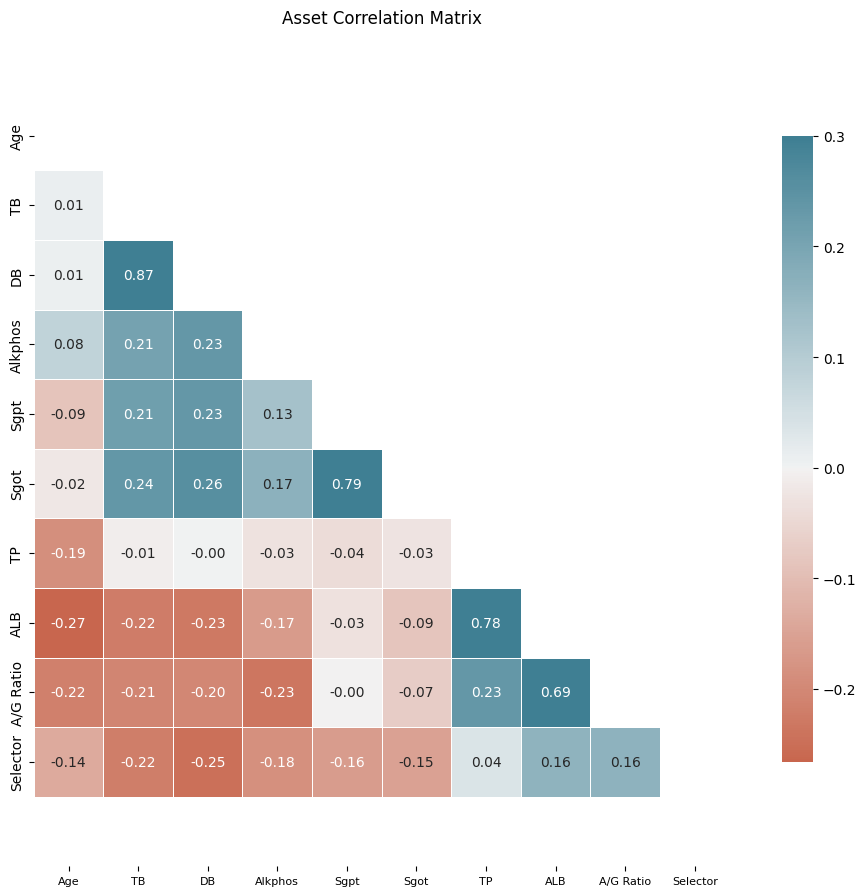

In [ ]:
corr = dataset.select_dtypes('number').corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 220, n=256, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,
            mask=mask,
            cmap=cmap,
            vmax=.3,
            center=0,
            square=True,
            linewidths=.5,
            annot = True,
            fmt='.2f',
            annot_kws={'size': 10},
            cbar_kws={"shrink": .75})

plt.title('Asset Correlation Matrix')
plt.tight_layout()
ax.tick_params(axis = 'x', labelsize = 8)
ax.set_ylim(len(corr)+1, -1)

Splitting the dataset into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report

log_reg_model = LogisticRegression(
    C=1.0,               # Regularization strength (default=1.0)
    penalty='l2',        # Regularization type: L2 (default) or L1
    solver='lbfgs',      # Optimization algorithm: 'lbfgs' (default), 'liblinear', 'sag', 'saga', 'newton-cg'
    class_weight=None,   # Class weights: None (default), 'balanced', or custom weights
    max_iter=100,        # Maximum number of iterations (default=100)
    random_state=42,     # Random seed for reproducibility (default=None)
)

log_reg_model.fit(X_train, y_train)

y_pred_log_reg = log_reg_model.predict(X_test)

# print("Classification Report:")
# print(classification_report(y_test, y_pred_log_reg))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred_log_reg)
print("Precision:", precision)

recall = recall_score(y_test, y_pred_log_reg)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred_log_reg)
print("F1-score:", f1)

auc_roc = roc_auc_score(y_test, y_pred_log_reg)
print("AUC-ROC:", auc_roc)

conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7435897435897436
Precision: 0.7623762376237624
Recall: 0.927710843373494
F1-score: 0.8369565217391305
AUC-ROC: 0.6109142452161588
Confusion Matrix:
[[77  6]
 [24 10]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

# print("KNN Classification Report:")
# print(classification_report(y_test, y_pred_knn))

In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

precision_knn = precision_score(y_test, y_pred_knn)
print("KNN Precision:", precision_knn)

recall_knn = recall_score(y_test, y_pred_knn)
print("KNN Recall:", recall_knn)

f1_knn = f1_score(y_test, y_pred_knn)
print("KNN F1-score:", f1_knn)

auc_roc_knn = roc_auc_score(y_test, y_pred_knn)
print("KNN AUC-ROC:", auc_roc_knn)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN Confusion Matrix:")
print(conf_matrix_knn)

KNN Accuracy: 0.6410256410256411
KNN Precision: 0.7411764705882353
KNN Recall: 0.7590361445783133
KNN F1-score: 0.7499999999999999
KNN AUC-ROC: 0.5559886605244507
KNN Confusion Matrix:
[[63 20]
 [22 12]]


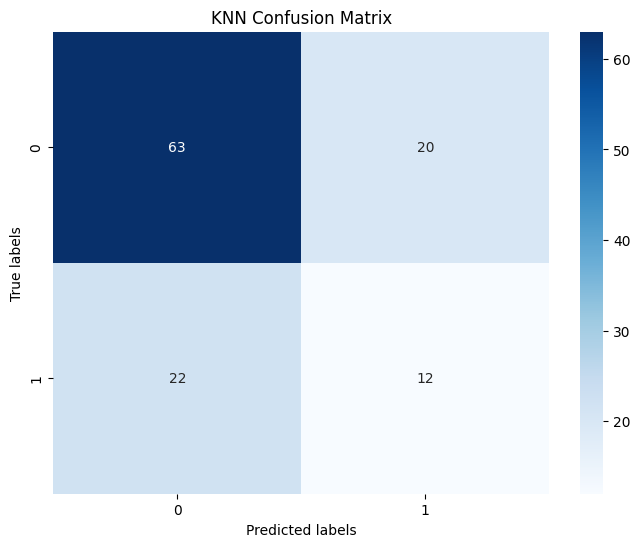

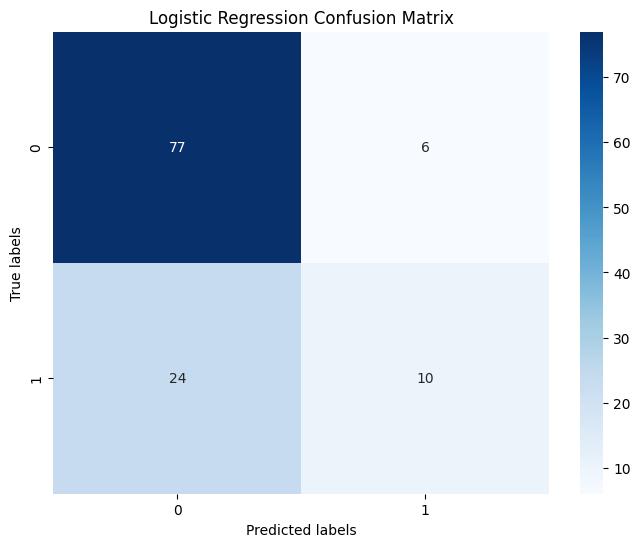

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')
plot_confusion_matrix(y_test, y_pred_log_reg, 'Logistic Regression Confusion Matrix')

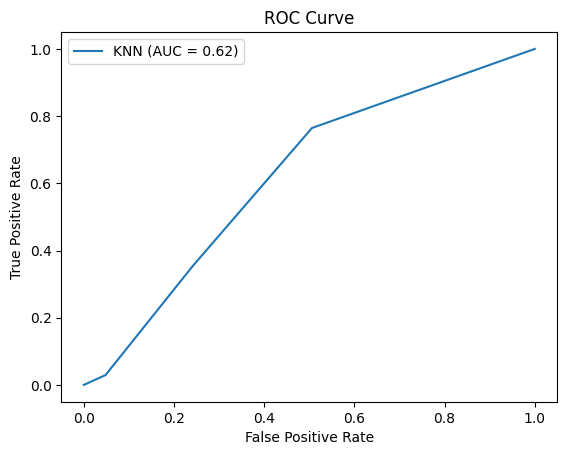

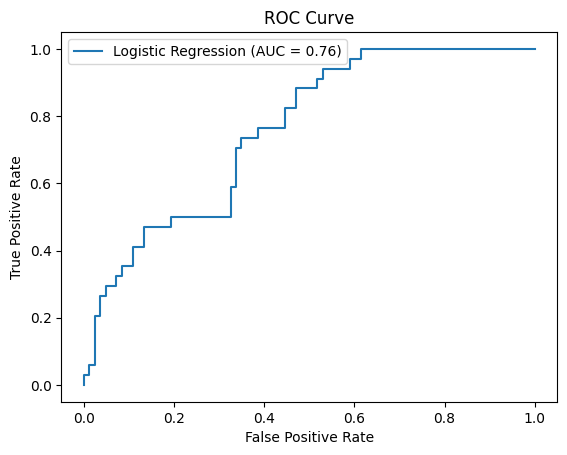

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_scores, label):
    fpr, tpr, _ = roc_curve(y_true, y_scores,pos_label=2)
    auc = roc_auc_score(y_true, y_scores)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

knn_scores = knn_model.predict_proba(X_test)[:, 1]
log_reg_scores = log_reg_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, knn_scores, 'KNN')
plot_roc_curve(y_test, log_reg_scores, 'Logistic Regression')


Computational Complexity

In [ ]:
import time

# Measure training time for KNN
start_time = time.time()
knn_model.fit(X_train, y_train)
knn_model_train_time = time.time() - start_time

# Measure prediction time for KNN
start_time = time.time()
y_pred_knn = knn_model.predict(X_test)
y_pred_knn_time = time.time() - start_time

# Measure training time for Logistic Regression
start_time = time.time()
log_reg_model.fit(X_train, y_train)
log_reg_model_train_time = time.time() - start_time

# Measure prediction time for Logistic Regression
start_time = time.time()
y_pred_log_reg = log_reg_model.predict(X_test)
y_pred_log_reg_time = time.time() - start_time

print("KNN Training Time:", knn_model_train_time)
print("KNN Prediction Time:", y_pred_knn_time)
print("Logistic Regression Training Time:", log_reg_model_train_time)
print("Logistic Regression Prediction Time:", y_pred_log_reg_time)
print("Total KNN Time:", knn_model_train_time + y_pred_knn_time)
print("Total Logistic Regression Time:", log_reg_model_train_time + y_pred_log_reg_time)



KNN Training Time: 0.0017113685607910156
KNN Prediction Time: 0.00780797004699707
Logistic Regression Training Time: 0.006580352783203125
Logistic Regression Prediction Time: 0.0004401206970214844
Total KNN Time: 0.009519338607788086
Total Logistic Regression Time: 0.007020473480224609


Interpretability

In [ ]:
# Coefficients of Logistic Regression
log_reg_coeffs = log_reg_model.coef_

# Nearest neighbors in KNN (can vary based on k value)
# KNN doesn't have coefficients in the same sense as logistic regression

feature_names = [f"Feature_{i}" for i in range(len(log_reg_coeffs[0]))]

for feature, coefficient in zip(feature_names, log_reg_coeffs[0]):
    print(f"{feature}: {coefficient}")

Feature_0: -0.33684642877873044
Feature_1: 0.16418306568306062
Feature_2: -0.3087585416789892
Feature_3: -0.6910846915408745
Feature_4: -0.3916884173344825
Feature_5: -1.3207663388273216
Feature_6: -0.8947305328181886
Feature_7: -0.5327942641196675
Feature_8: 0.670091096353464
Feature_9: -0.12536286606137134


Robustness to Noise

In [ ]:
# Introduce noise to the dataset
# Add random noise to a fraction of the dataset

noise_ratio = 0.1  # Percentage of noise
num_noise_samples = int(noise_ratio * len(X_train))

# Randomly select indices for adding noise
noise_indices = np.random.choice(len(X_train), num_noise_samples, replace=False)

# Flip labels for selected noisy samples
y_train_noise = y_train.copy()
y_train_noise[noise_indices] = 1 - y_train_noise[noise_indices]

# Retrain models with noisy labels
knn_noise = KNeighborsClassifier(n_neighbors=5)
log_reg_noise = LogisticRegression()

knn_noise.fit(X_train, y_train_noise)
log_reg_noise.fit(X_train, y_train_noise)

# Evaluate performance with noisy labels
knn_noise_accuracy = accuracy_score(y_test, knn_noise.predict(X_test))
log_reg_noise_accuracy = accuracy_score(y_test, log_reg_noise.predict(X_test))

print("KNN Accuracy with Noise:", knn_noise_accuracy)
print("Logistic Regression Accuracy with Noise:", log_reg_noise_accuracy)


KNN Accuracy with Noise: 0.6153846153846154
Logistic Regression Accuracy with Noise: 0.7521367521367521


Scalability

In [ ]:
# Vary dataset size and measure training time
sizes = [100, 200, 300, 400, 500]
train_times_knn = []
train_times_log_reg = []

for size in sizes:
    X_train_subset = X_train[:size]
    y_train_subset = y_train[:size]

    # Train KNN
    start_time = time.time()
    knn_model.fit(X_train_subset, y_train_subset)
    train_times_knn.append(time.time() - start_time)

    # Train Logistic Regression
    start_time = time.time()
    log_reg_model.fit(X_train_subset, y_train_subset)
    train_times_log_reg.append(time.time() - start_time)

print("KNN Training Times:", train_times_knn)
print("Logistic Regression Training Times:", train_times_log_reg)

KNN Training Times: [0.0015134811401367188, 0.000990152359008789, 0.0010404586791992188, 0.001283884048461914, 0.0012154579162597656]
Logistic Regression Training Times: [0.007681369781494141, 0.004430294036865234, 0.006884574890136719, 0.0065767765045166016, 0.0061261653900146484]
